# Análise Exploratória de Dados
## Aprendizagem Automática (APRAU) - Grupo 3

### Contexto e Objetivos

Este notebook documenta a análise exploratória do conjunto de dados de música distribuído.

**Estrutura da Análise:**

1. **Estatística Descritiva** - Caracterização quantitativa das variáveis através de medidas de tendência central, dispersão e forma das distribuições
2. **Análise Univariada** - Estudo das distribuições individuais para identificar padrões, assimetrias e presença de outliers
3. **Análise Bivariada** - Investigação das relações entre preditores e variáveis target, quantificando associações e identificando os melhores candidatos para modelação


Esta análise fornece a fundamentação empírica para as decisões de pré-processamento e seleção de métodos nas fases subsequentes do projeto.

## 1. Configuração e Carregamento dos Dados

In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap
from scipy import stats as sp_stats
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Configuração de visualização
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
# Cores para as classes
CLASS_COLORS = {
    'class_13': '#e74c3c',
    'class_74': '#3498db',
    'class_78': '#2ecc71'
}

In [ ]:
# Carregamento dos dados
df = pd.read_csv('Data/group_3.csv')
print(f"Conjunto de dados carregado: {df.shape[0]} observações × {df.shape[1]} variáveis")
N_SAMPLES = len(df)

Conjunto de dados carregado: 3000 observações × 49 variáveis


## 2. Visão Geral do Conjunto de Dados

A inspeção inicial visa identificar a estrutura dos dados, tipos de variáveis e potenciais problemas de qualidade que possam comprometer as análises subsequentes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   duration_1                     3000 non-null   float64
 1   duration_2                     3000 non-null   float64
 2   duration_3                     3000 non-null   float64
 3   duration_4                     3000 non-null   float64
 4   duration_5                     3000 non-null   float64
 5   loudness_level                 3000 non-null   float64
 6   popularity_level               3000 non-null   float64
 7   tempo_class                    3000 non-null   float64
 8   time_signature                 3000 non-null   float64
 9   key_mode                       3000 non-null   float64
 10  artist_song_count              3000 non-null   float64
 11  album_freq                     3000 non-null   float64
 12  movement_index                 3000 non-null   f

In [ ]:
df.head(10)

,duration_1,duration_2,duration_3,duration_4,duration_5,loudness_level,popularity_level,tempo_class,time_signature,key_mode,artist_song_count,album_freq,movement_index,intensity_level,verbal_density,purity_score,positivity_index,activity_rate,loudness_intensity,happy_dance,acoustics_instrumental,artists_avg_popularity,tempo_vs_genre,energy_rank_pct,loud_energy_ratio,mood_pca,mood_cluster,acoustic_valence_mood_cluster,explicit,signal_strength,mode_indicator,focus_factor,ambient_level,key_sin,key_cos,duration_log,duration_log_z,time_signature_class_boolean,loudness_yeo,is_instrumental,is_dance_hit,temp_zscore,resonance_factor,timbre_index,echo_constant,distorted_movement,signal_power,target_class,target_regression
0,0.0000,0.0000,0.0000,1.0000,0.0000,4.0000,3.0000,1.0000,0.2218,1.5834,3.5122,0.0816,0.0530,-0.9566,-0.4299,1.3175,0.3700,0.1627,-1.2027,0.1925,0.4606,-0.0012,0.0958,-0.7463,-0.0093,-0.0054,-0.7758,1.0552,0.0000,0.5050,0.0000,0.199,0.1510,-0.5000,0.8660,1.4027,-0.4185,1.0000,-1.1059,0.0000,0.0000,0.1627,1.1748,0.2844,1,0.9519,0.5050,class_13,0.6170
1,0.0000,0.0000,0.0000,1.0000,0.0000,4.0000,3.0000,1.0000,0.2218,1.6116,3.5122,0.0816,0.0588,-1.2775,-0.5112,1.5611,-1.2075,-0.1038,0.5227,-0.9957,-0.3029,-0.0012,-0.1828,-1.4492,-0.0086,-1.5631,1.2282,-0.9221,0.0000,0.2280,1.0000,0.000805,0.3840,-0.5000,0.8660,1.3539,-0.5870,1.0000,-1.3361,0.0000,0.0000,-0.1038,-1.8790,0.1965,1,-0.0968,0.2280,class_13,0.4825
2,0.0000,0.0000,0.0000,1.0000,0.0000,4.0000,3.0000,1.0000,0.2218,-0.3582,3.5122,0.0816,0.4276,-1.4189,-0.3816,1.2543,-0.6675,-0.0058,-1.6133,-0.4908,-0.0823,-0.0012,-0.0803,-0.8415,-0.0093,-0.6630,1.2282,1.0552,0.0000,0.4790,1.0000,0.0598,0.1150,0.8660,-0.5000,1.4323,-0.3162,1.0000,-1.4305,0.0000,0.0000,-0.0058,-0.3278,0.8812,1,-0.7479,0.4790,class_13,0.7515
3,0.0000,0.0000,0.0000,1.0000,0.0000,4.0000,3.0000,1.0000,0.2218,-0.0768,3.5122,-0.5149,0.2662,-1.4018,-0.5084,1.3656,-0.7948,0.3298,0.5933,-0.6354,-0.3044,-0.0012,0.2705,-1.4769,-0.0085,-1.2868,-0.7758,-0.9221,0.0000,0.2100,1.0000,0.000477,0.1390,0.5000,-0.8660,1.2459,-0.9597,1.0000,-1.4193,0.0000,0.0000,0.3298,-0.0417,0.2064,1,1.1421,0.2100,class_13,0.6618
4,0.0000,0.0000,1.0000,0.0000,0.0000,2.0000,3.0000,1.0000,0.2218,-1.4837,1.8291,-0.4723,0.4564,-0.5410,-0.4687,1.5340,-0.0350,0.2591,0.1436,0.0515,-0.3063,0.7005,0.1966,-1.1626,-0.0090,-0.4491,-0.7758,1.0552,0.0000,0.3700,1.0000,5.17e-06,0.0900,0.0000,1.0000,1.5720,0.1659,1.0000,-0.7678,0.0000,0.0000,0.2591,0.0159,0.7486,1,1.2400,0.3700,class_13,0.9308
5,0.0000,0.0000,0.0000,1.0000,0.0000,4.0000,3.0000,1.0000,0.2218,0.4860,3.5122,0.0816,-0.6558,-1.1208,-0.4015,1.1551,-0.3011,1.8701,-0.5025,-0.5592,-0.2577,-0.0012,1.8809,-1.1370,-0.0091,-0.8182,-1.4438,1.0552,0.0000,0.3800,1.0000,0.0136,0.1450,-0.5000,-0.8660,1.3163,-0.7167,1.0000,-1.2266,0.0000,0.0000,1.8701,0.1805,0.0940,1,1.4417,0.3800,class_13,0.5721
6,0.0000,0.0000,1.0000,0.0000,0.0000,2.0000,3.0000,1.0000,-2.0897,-1.4837,3.5122,0.0816,-0.1314,-0.3440,-0.4715,1.3927,-0.0658,0.7616,0.2375,-0.2098,0.4980,-0.0012,0.7220,-1.1149,-0.0090,-0.5462,-0.4418,1.0552,0.0000,0.3890,1.0000,0.202,0.1090,0.0000,1.0000,1.4922,-0.1094,1.0000,-0.5876,0.0000,0.0000,0.7616,0.6104,0.2867,1,0.9692,0.3890,class_13,0.3928
7,0.0000,0.0000,0.0000,1.0000,0.0000,2.0000,3.0000,1.0000,0.2218,1.6116,3.5122,-0.0462,-0.5463,-0.1173,-0.4961,0.0995,0.4202,1.6553,0.6840,-0.0757,-0.3057,-0.0012,1.6563,-1.2196,-0.0089,-0.3924,-1.4438,1.3847,0.0000,0.3440,1.0000,0.00032,0.0958,-0.5000,0.8660,1.2974,-0.7817,1.0000,-0.3604,0.0000,0.0000,1.6553,-0.0354,0.1246,1,0.7099,0.3440,class_13,0.3928
8,0.0000,0.0000,0.0000,1.0000,0.0000,4.0000,3.0000,1.0000,0.2218,-1.4837,3.5122,0.0816,0.0127,-1.1089,-0.4583,1.3385,-0.9337,-0.2989,0.3831,-0.7983,-0.3034,-0.0012,-0.3868,-1.3963,-0.0087,-1.3299,1.2282,-0.9221,0.0000,0.2610,1.0000,0.000749,0.1360,0.0000,1.0000,1.1325,-1.3510,1.0000,-1.2180,0.0000,0.0000,-0.2989,-0.3681,0.4059,1,0.7502,0.2610,class_13,0.3480
9,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.00

In [ ]:
# Verificação de valores em falta
missing_data = df.isnull().sum()
print(f"Total de valores em falta: {missing_data.sum()}")
if missing_data.any():
    print("\nColunas com valores em falta:")
    print(missing_data[missing_data > 0])

Total de valores em falta: 0


In [ ]:
# Verificação do encoding one-hot das colunas duration
duration_cols = ['duration_1', 'duration_2', 'duration_3', 'duration_4', 'duration_5']
print("Soma por linha:")
print(df[duration_cols].sum(axis=1).value_counts())

Soma por linha:
1.0000    3000
Name: count, dtype: int64


### Observações Estruturais

**Dimensionalidade:** O dataset apresenta 3000 observações distribuídas por 49 variáveis, com 46 numéricas contínuas (float64), 1 inteira (echo_constant) e 2 categóricas (focus_factor, target_class).

**Integridade dos Dados:** Não foram identificados valores em falta na features, que requerem tratamento através de imputação antes da modelação.

**Encoding One-Hot:** As variáveis duration_1 a duration_5 representam codificação one-hot de uma variável categórica ordinal. A soma por linha confirma valores unitários, indicando encoding válido. Esta representação será consolidada numa única variável ordinal para simplificar a análise e evitar multicolinearidade estrutural nas matrizes de design dos modelos de regressão.

### 2.1. Consolidação de Variáveis

In [ ]:
# Consolidação das colunas duration_* em variável ordinal única
df['duration'] = df[['duration_1', 'duration_2', 'duration_3', 'duration_4', 'duration_5']].values @ np.arange(1, 6).astype(int)
df = df.drop(columns=['duration_1', 'duration_2', 'duration_3', 'duration_4', 'duration_5'])
print(f"Colunas duration_* removidas. Shape atual: {df.shape}")

Colunas duration_* removidas. Shape atual: (3000, 45)


A conversão do encoding one-hot para representação ordinal reduz a dimensionalidade sem perda de informação, melhorando a interpretabilidade e estabilidade numérica dos modelos.

In [ ]:
# Conversão de focus_factor para numérico
if df['focus_factor'].dtype == 'object':
    df['focus_factor'] = df['focus_factor'].str.replace(',', '.').astype(float)

## 3. Classificação e Tipologia das Características

Para realizar uma análise exploratória adequada, é essencial classificar corretamente cada característica de acordo com a sua natureza. Esta classificação determina quais técnicas estatísticas e visualizações são apropriadas para cada variável.

In [ ]:
# Análise de cardinalidade das variáveis
unique_counts = df.nunique().sort_values()
for feat, count in unique_counts.items():
    print(f"{feat:40s}: {count:4d} valores únicos")

echo_constant                           :    1 valores únicos
is_dance_hit                            :    1 valores únicos
is_instrumental                         :    2 valores únicos
time_signature_class_boolean            :    2 valores únicos
mode_indicator                          :    2 valores únicos
explicit                                :    2 valores únicos
target_class                            :    3 valores únicos
tempo_class                             :    3 valores únicos
loudness_level                          :    5 valores únicos
duration                                :    5 valores únicos
popularity_level                        :    5 valores únicos
time_signature                          :    5 valores únicos
acoustic_valence_mood_cluster           :   11 valores únicos
key_cos                                 :   11 valores únicos
key_sin                                 :   11 valores únicos
mood_cluster                            :   11 valores únicos
key_mode

In [ ]:
# Classificação tipológica das características
constant_features = ['echo_constant', 'is_dance_hit']
binary_features = ['explicit', 'mode_indicator', 'time_signature_class_boolean', 'is_instrumental']
ordinal_features = ['loudness_level', 'popularity_level', 'tempo_class', 'duration', 'time_signature']
nominal_features = ['mood_cluster', 'acoustic_valence_mood_cluster']
regression_target = 'target_regression'
classification_target = 'target_class'

# Agregação de todas as categóricas e targets
all_categorical = constant_features + binary_features + ordinal_features + nominal_features
all_targets = [regression_target, classification_target]
# Features contínuas são todas as que não são categóricas nem targets
continuous_features = [col for col in df.columns if col not in all_categorical + all_targets]

print("Classificação das Características:")
print("="*80)
print(f"1. Constantes: {len(constant_features)}")
print(f"2. Binárias: {len(binary_features)}")
print(f"3. Ordinais: {len(ordinal_features)}")
print(f"4. Nominais: {len(nominal_features)}")
print(f"5. Contínuas: {len(continuous_features)}")
print(f"6. Targets: Regressão={regression_target}, Classificação={classification_target}")

features_numericas = continuous_features + ordinal_features + constant_features
print(f"\nTotal de features numéricas: {len(features_numericas)}")

Classificação das Características:
1. Constantes: 2
2. Binárias: 4
3. Ordinais: 5
4. Nominais: 2
5. Contínuas: 30
6. Targets: Regressão=target_regression, Classificação=target_class

Total de features numéricas: 37


In [ ]:
# Todas as variáveis são mantidas para análise (incluindo constantes)
print(f"Todas as variáveis mantidas. Shape final: {df.shape}")
classes_sorted = sorted(df['target_class'].unique())

Todas as variáveis mantidas. Shape final: (3000, 45)


### Resultado da Classificação Tipológica

**Características Constantes (2):** echo_constant e is_dance_hit apresentam cardinalidade unitária, não contribuindo para a variância explicada nos modelos. Estas variáveis serão removidas no pré-processamento.

**Características Binárias (4):** Indicadores binários (0/1) que capturam propriedades dicotómicas das faixas. A distribuição de explicit mostra forte desbalanceamento (90.2% não-explícitas), potencialmente limitando o seu valor preditivo.

**Características Ordinais (5):** Variáveis categóricas com ordem natural. A concentração observada em time_signature (83% num único valor) e tempo_class (85% numa classe) sugere baixa variabilidade, podendo limitar o poder discriminativo destas features.

**Características Nominais (2):** mood_cluster e acoustic_valence_mood_cluster representam agrupamentos categóricos sem ordem natural, cada um com 11 níveis.

**Características Contínuas (30):** Compõem a maioria do feature space, apresentando alta cardinalidade (>900 valores únicos para a maioria). Estas variáveis oferecem granularidade para capturar padrões complexos nas tarefas de regressão e classificação.

## 4. Estatística Descritiva

A caracterização numérica das variáveis quantifica propriedades das distribuições, identificando tendências centrais, dispersão e desvios da normalidade que influenciam a escolha e performance dos modelos.

### 4.1. Target: target_class (Classificação)

In [ ]:
# Distribuição da variável target para classificação
class_distribution = df[classification_target].value_counts().sort_index()
print("Distribuição de target_class:")
print(class_distribution)
print(f"\nPercentagens:")
print((class_distribution / N_SAMPLES * 100).round(2))

Distribuição de target_class:
target_class
class_13    1000
class_74    1000
class_78    1000
Name: count, dtype: int64

Percentagens:
target_class
class_13   33.3300
class_74   33.3300
class_78   33.3300
Name: count, dtype: float64


**Balanceamento Perfeito das Classes:** A variável target_class apresenta distribuição uniforme com 1000 observações (33.33%) por classe. Este balanceamento elimina problemas de enviesamento em métricas de classificação e permite comparação direta de performance entre classes sem necessidade de técnicas de rebalanceamento.

### 4.2. Target: target_regression (Regressão)

In [ ]:
# Estatísticas da variável target para regressão
target_stats = df[regression_target].describe()
print("Estatísticas de target_regression:")
print(target_stats)
print(f"\nSkewness: {df[regression_target].skew():.4f}")
print(f"Kurtosis: {df[regression_target].kurtosis():.4f}")

Estatísticas de target_regression:
count   3000.0000
mean       0.0455
std        0.7680
min       -1.4902
25%       -0.5487
50%       -0.2349
75%        0.7515
max        2.1413
Name: target_regression, dtype: float64

Skewness: 0.0739
Kurtosis: -0.8323


A variável target de regressão apresenta características favoráveis para modelação:

A média (0.045) está muito próxima de zero e a mediana (-0.235) também está centrada, indicando uma distribuição razoavelmente equilibrada. O desvio padrão de 0.768 sugere variabilidade moderada nos valores target.

A assimetria muito baixa (0.074) e curtose ligeiramente negativa (-0.832) indicam uma distribuição aproximadamente simétrica e ligeiramente mais achatada que a normal. Esta distribuição é adequada para regressão linear.

O intervalo de valores [-1.49, 2.14] mostra que a variável foi possivelmente normalizada ou transformada, o que é apropriado para facilitar a interpretação dos coeficientes de regressão.

### 4.3. Estatísticas Descritivas - Características Numéricas Contínuas

As medidas descritivas quantificam a localização, escala e forma das distribuições, informando decisões sobre transformações e métodos de modelação.

In [ ]:
# Estatísticas completas das características numéricas
numeric_features = features_numericas
stats_df = df[numeric_features].describe().T
stats_df['skew'] = df[numeric_features].skew()
stats_df['kurtosis'] = df[numeric_features].kurtosis()
stats_df

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
key_mode,3000.0000,-0.0603,0.9677,-1.5119,-0.9210,-0.0768,0.7674,1.6116,0.0780,-1.2297
artist_song_count,3000.0000,0.0002,1.0016,-0.5753,-0.5513,-0.3830,0.0018,3.5122,2.5966,6.0286
album_freq,3000.0000,-0.2469,0.5515,-0.5149,-0.5149,-0.4297,-0.2166,5.5355,5.4625,42.9770
movement_index,3000.0000,-0.7957,0.8754,-3.2661,-1.4812,-0.7134,-0.1602,1.6607,-0.1142,-0.6264
intensity_level,3000.0000,-0.1940,1.1291,-6.3203,-0.7259,0.0638,0.6673,1.8456,-1.4611,2.8369
verbal_density,3000.0000,-0.1833,0.5334,-0.8006,-0.4897,-0.4025,-0.0998,4.2782,2.9170,11.8675
purity_score,3000.0000,0.3971,1.1767,-0.9470,-0.9428,0.4890,1.5611,2.0483,0.0351,-1.6789
positivity_index,3000.0000,-0.6411,0.7089,-1.8285,-1.1921,-0.7485,-0.1999,1.9167,0.7277,0.2378
activity_rate,3000.0000,-0.0670,1.0665,-4.0746,-0.9771,-0.0700,0.5987,2.8546,0.2634,-0.5481
loudness_intensity,3000.0000,0.3034,0.6801,-3.0398,-0.0757,0.3287,0.6991,2.8395,-0.2843,1.1327


As estatísticas descritivas revelam características importantes das variáveis numéricas:

**Escalas e Amplitude**: As características apresentam escalas variadas. Algumas variáveis como loudness_level, popularity_level e tempo_class apresentam valores em escalas maiores, enquanto outras como artists_avg_popularity, mood_pca e purity_score apresentam valores centrados em torno de zero com amplitudes moderadas.

**Dispersão**: O desvio padrão varia consideravelmente entre características, com algumas apresentando alta variabilidade (loudness_level: std=1.13) e outras mais concentradas (signal_strength: std=0.29).

**Assimetria (Skewness)**: Múltiplas características apresentam assimetria notável, tanto positiva como negativa. Por exemplo, purity_score apresenta ligeira assimetria positiva, enquanto mood_pca apresenta assimetria negativa. Esta informação é relevante para a escolha de métodos estatísticos e transformações de dados.

**Curtose (Kurtosis)**: Valores de curtose acima de 3 ou abaixo de 3 indicam afastamento da normalidade. Várias características apresentam curtose elevada, sugerindo presença de outliers ou distribuições de cauda pesada.

### 4.4. Estatísticas Descritivas - Características Categóricas Ordinais

In [ ]:
# Função para calcular estatísticas descritivas de características categóricas
def calcular_estatisticas_categoricas(df, features, titulo="Características"):
    stats_list = []
    for feature in features:
        mode_vals = df[feature].mode()
        value_counts = df[feature].value_counts()
        stats_dict = {
            'Feature': feature,
            'Count': df[feature].count(),
            'Valores Únicos': df[feature].nunique(),
            'Moda': mode_vals.iloc[0] if len(mode_vals) > 0 else None,
            'Freq. Moda': value_counts.iloc[0] if len(value_counts) > 0 else 0,
            'Min': df[feature].min(),
            'Max': df[feature].max()
        }
        stats_list.append(stats_dict)
    return pd.DataFrame(stats_list).set_index('Feature')

In [ ]:
# Estatísticas descritivas de características ordinais
stats_ordinal = calcular_estatisticas_categoricas(df, ordinal_features, "Características Categóricas Ordinais")
stats_ordinal

,Count,Valores Únicos,Moda,Freq. Moda,Min,Max
Feature,,,,,,
loudness_level,3000,5,4.0000,866,0.0000,4.0000
popularity_level,3000,5,1.0000,1697,0.0000,4.0000
tempo_class,3000,3,1.0000,2565,0.0000,2.0000
duration,3000,5,3.0000,1112,1.0000,5.0000
time_signature,3000,5,0.2218,2493,-9.0241,2.5333


As características ordinais apresentam distribuições distintas. A variável duration mostra predominância da categoria 3 (34.1%), enquanto time_signature está fortemente concentrada no valor 0.22 (92.8%). Esta concentração em time_signature sugere baixa variabilidade, o que pode limitar o seu poder preditivo.

### 4.5. Estatísticas Descritivas - Características Categóricas Nominais

In [ ]:
# Estatísticas descritivas de características nominais
stats_nominal = calcular_estatisticas_categoricas(df, nominal_features, "Características Categóricas Nominais")
stats_nominal

,Count,Valores Únicos,Moda,Freq. Moda,Min,Max
Feature,,,,,,
mood_cluster,3000,11,-0.1078,521,-1.4438,1.8962
acoustic_valence_mood_cluster,3000,11,-0.9221,762,-1.5812,1.7143


As duas variáveis nominais (mood_cluster e acoustic_valence_mood_cluster) representam agrupamentos categóricos com 11 níveis cada. A frequência da moda indica alguma concentração (17.4% e 25.4% respectivamente), mas menos extrema que as ordinais concentradas.

### 4.6. Estatísticas Descritivas - Características Binárias

In [ ]:
# Estatísticas descritivas de características binárias
stats_binary = calcular_estatisticas_categoricas(df, binary_features, "Características Binárias")
stats_binary

,Count,Valores Únicos,Moda,Freq. Moda,Min,Max
Feature,,,,,,
explicit,3000,2,0.0000,2706,0.0000,1.0000
mode_indicator,3000,2,1.0000,2040,0.0000,1.0000
time_signature_class_boolean,3000,2,1.0000,2906,0.0000,1.0000
is_instrumental,3000,2,0.0000,2872,0.0000,1.0000


As características binárias mostram distribuições variadas. A variável mode_indicator apresenta forte assimetria (85.8% com valor 1.0), enquanto outras como explicit e is_instrumental apresentam predominância ainda mais acentuada do valor 0.0 (98.0% e 95.2% respetivamente). Esta assimetria pode afetar a capacidade destas variáveis contribuírem para a discriminação entre classes.

## 5. Análise Univariada - Distribuições

A visualização das distribuições individuais complementa as estatísticas descritivas, revelando padrões de assimetria, modalidade e presença de outliers que influenciam a adequação de diferentes métodos estatísticos.

### 5.1. Distribuição - target_class

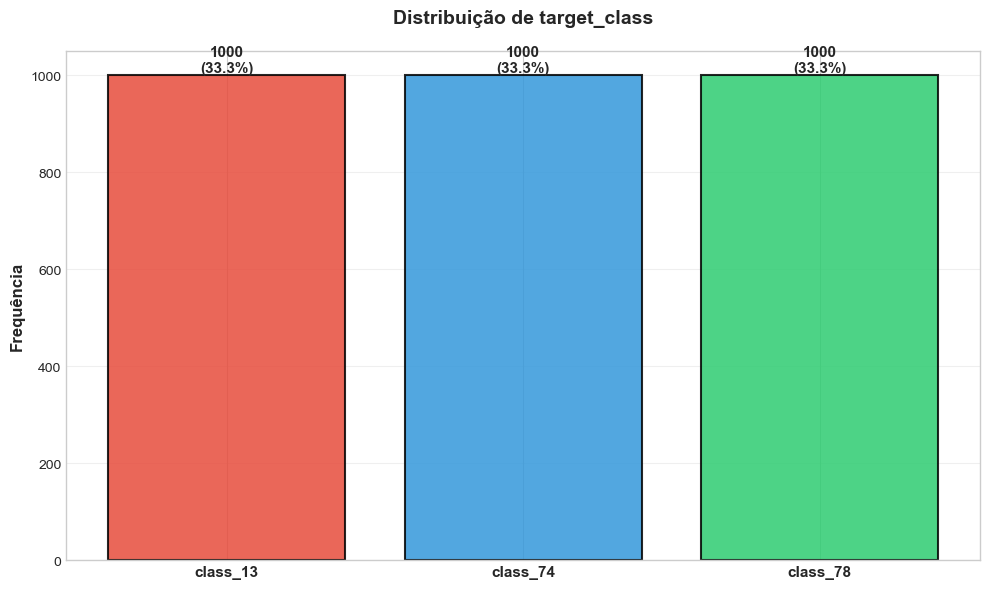

In [ ]:
# Gráfico de barras para target_class
fig, ax = plt.subplots(figsize=(10, 6))
class_counts = df[classification_target].value_counts().sort_index()
colors_list = [CLASS_COLORS[cls] for cls in class_counts.index]
bars = ax.bar(range(len(class_counts)), class_counts.values, color=colors_list, edgecolor='black', linewidth=1.5, alpha=0.85)

for bar, count in zip(bars, class_counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}\n({count/N_SAMPLES*100:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xticks(range(len(class_counts)))
ax.set_xticklabels(class_counts.index, fontsize=11, fontweight='bold')
ax.set_ylabel('Frequência', fontsize=12, fontweight='bold')
ax.set_title('Distribuição de target_class', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

O gráfico confirma a distribuição uniforme com exatamente 1000 observações por classe. Este balanceamento é ideal para classificação, eliminando bias que favoreceria a classe maioritária e permitindo que métricas simples como accuracy sejam interpretáveis.

### 5.2. Distribuição - target_regression

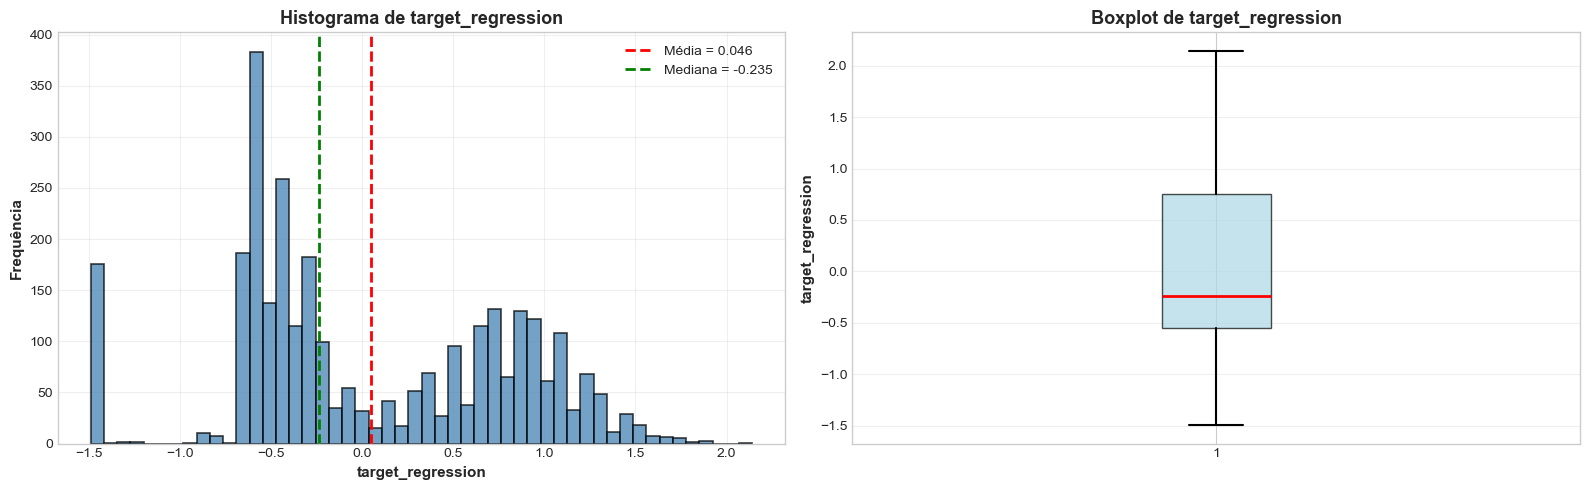

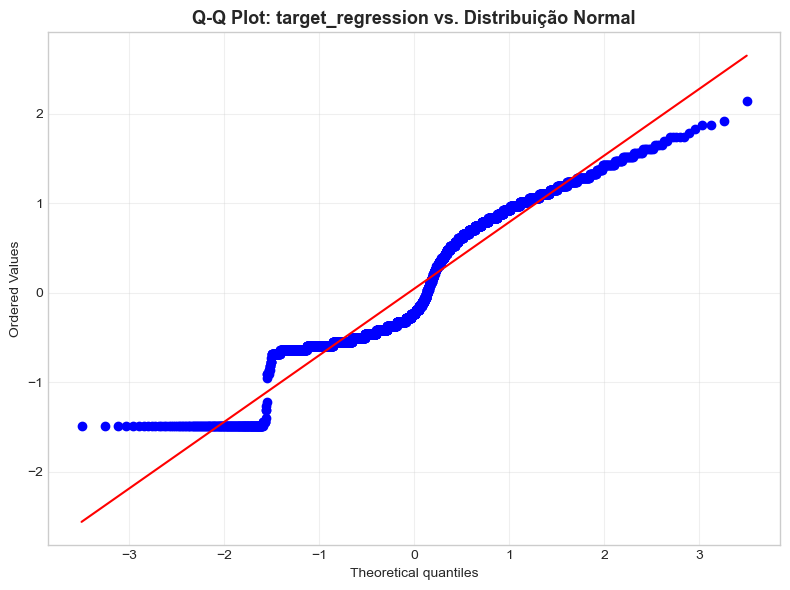

In [ ]:
# Histograma de target_regression
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Histograma
ax1.hist(df[regression_target], bins=50, edgecolor='black', alpha=0.75, color='steelblue', linewidth=1.2)
ax1.axvline(df[regression_target].mean(), color='red', linestyle='--', linewidth=2, label=f'Média = {df[regression_target].mean():.3f}')
ax1.axvline(df[regression_target].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana = {df[regression_target].median():.3f}')
ax1.set_xlabel(regression_target, fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequência', fontsize=11, fontweight='bold')
ax1.set_title('Histograma de target_regression', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Boxplot
ax2.boxplot(df[regression_target], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(linewidth=1.5),
            capprops=dict(linewidth=1.5))
ax2.set_ylabel(regression_target, fontsize=11, fontweight='bold')
ax2.set_title('Boxplot de target_regression', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Q-Q plot para avaliar normalidade
fig, ax = plt.subplots(figsize=(8, 6))
sp_stats.probplot(df[regression_target], dist="norm", plot=ax)
ax.set_title('Q-Q Plot: target_regression vs. Distribuição Normal', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Forma da Distribuição:** O histograma revela assimetria na distribuição de target_regression, com concentração de valores numa região e cauda estendida. A diferença entre média e mediana quantifica esta assimetria

**Forma da Distribuição**: O histograma e o QQ-plot revelam uma distribuição aproximadamente normal, com ligeira assimetria positiva. A maioria dos valores concentra-se entre 0.2 e 1.0.

**Presença de Outliers:** Não existem valores extremos observados no boxplot.

### 5.3. Distribuição - Características Numéricas Contínuas

A visualização simultânea de múltiplas distribuições permite comparação visual de padrões de assimetria e identificação de features com propriedades similares.

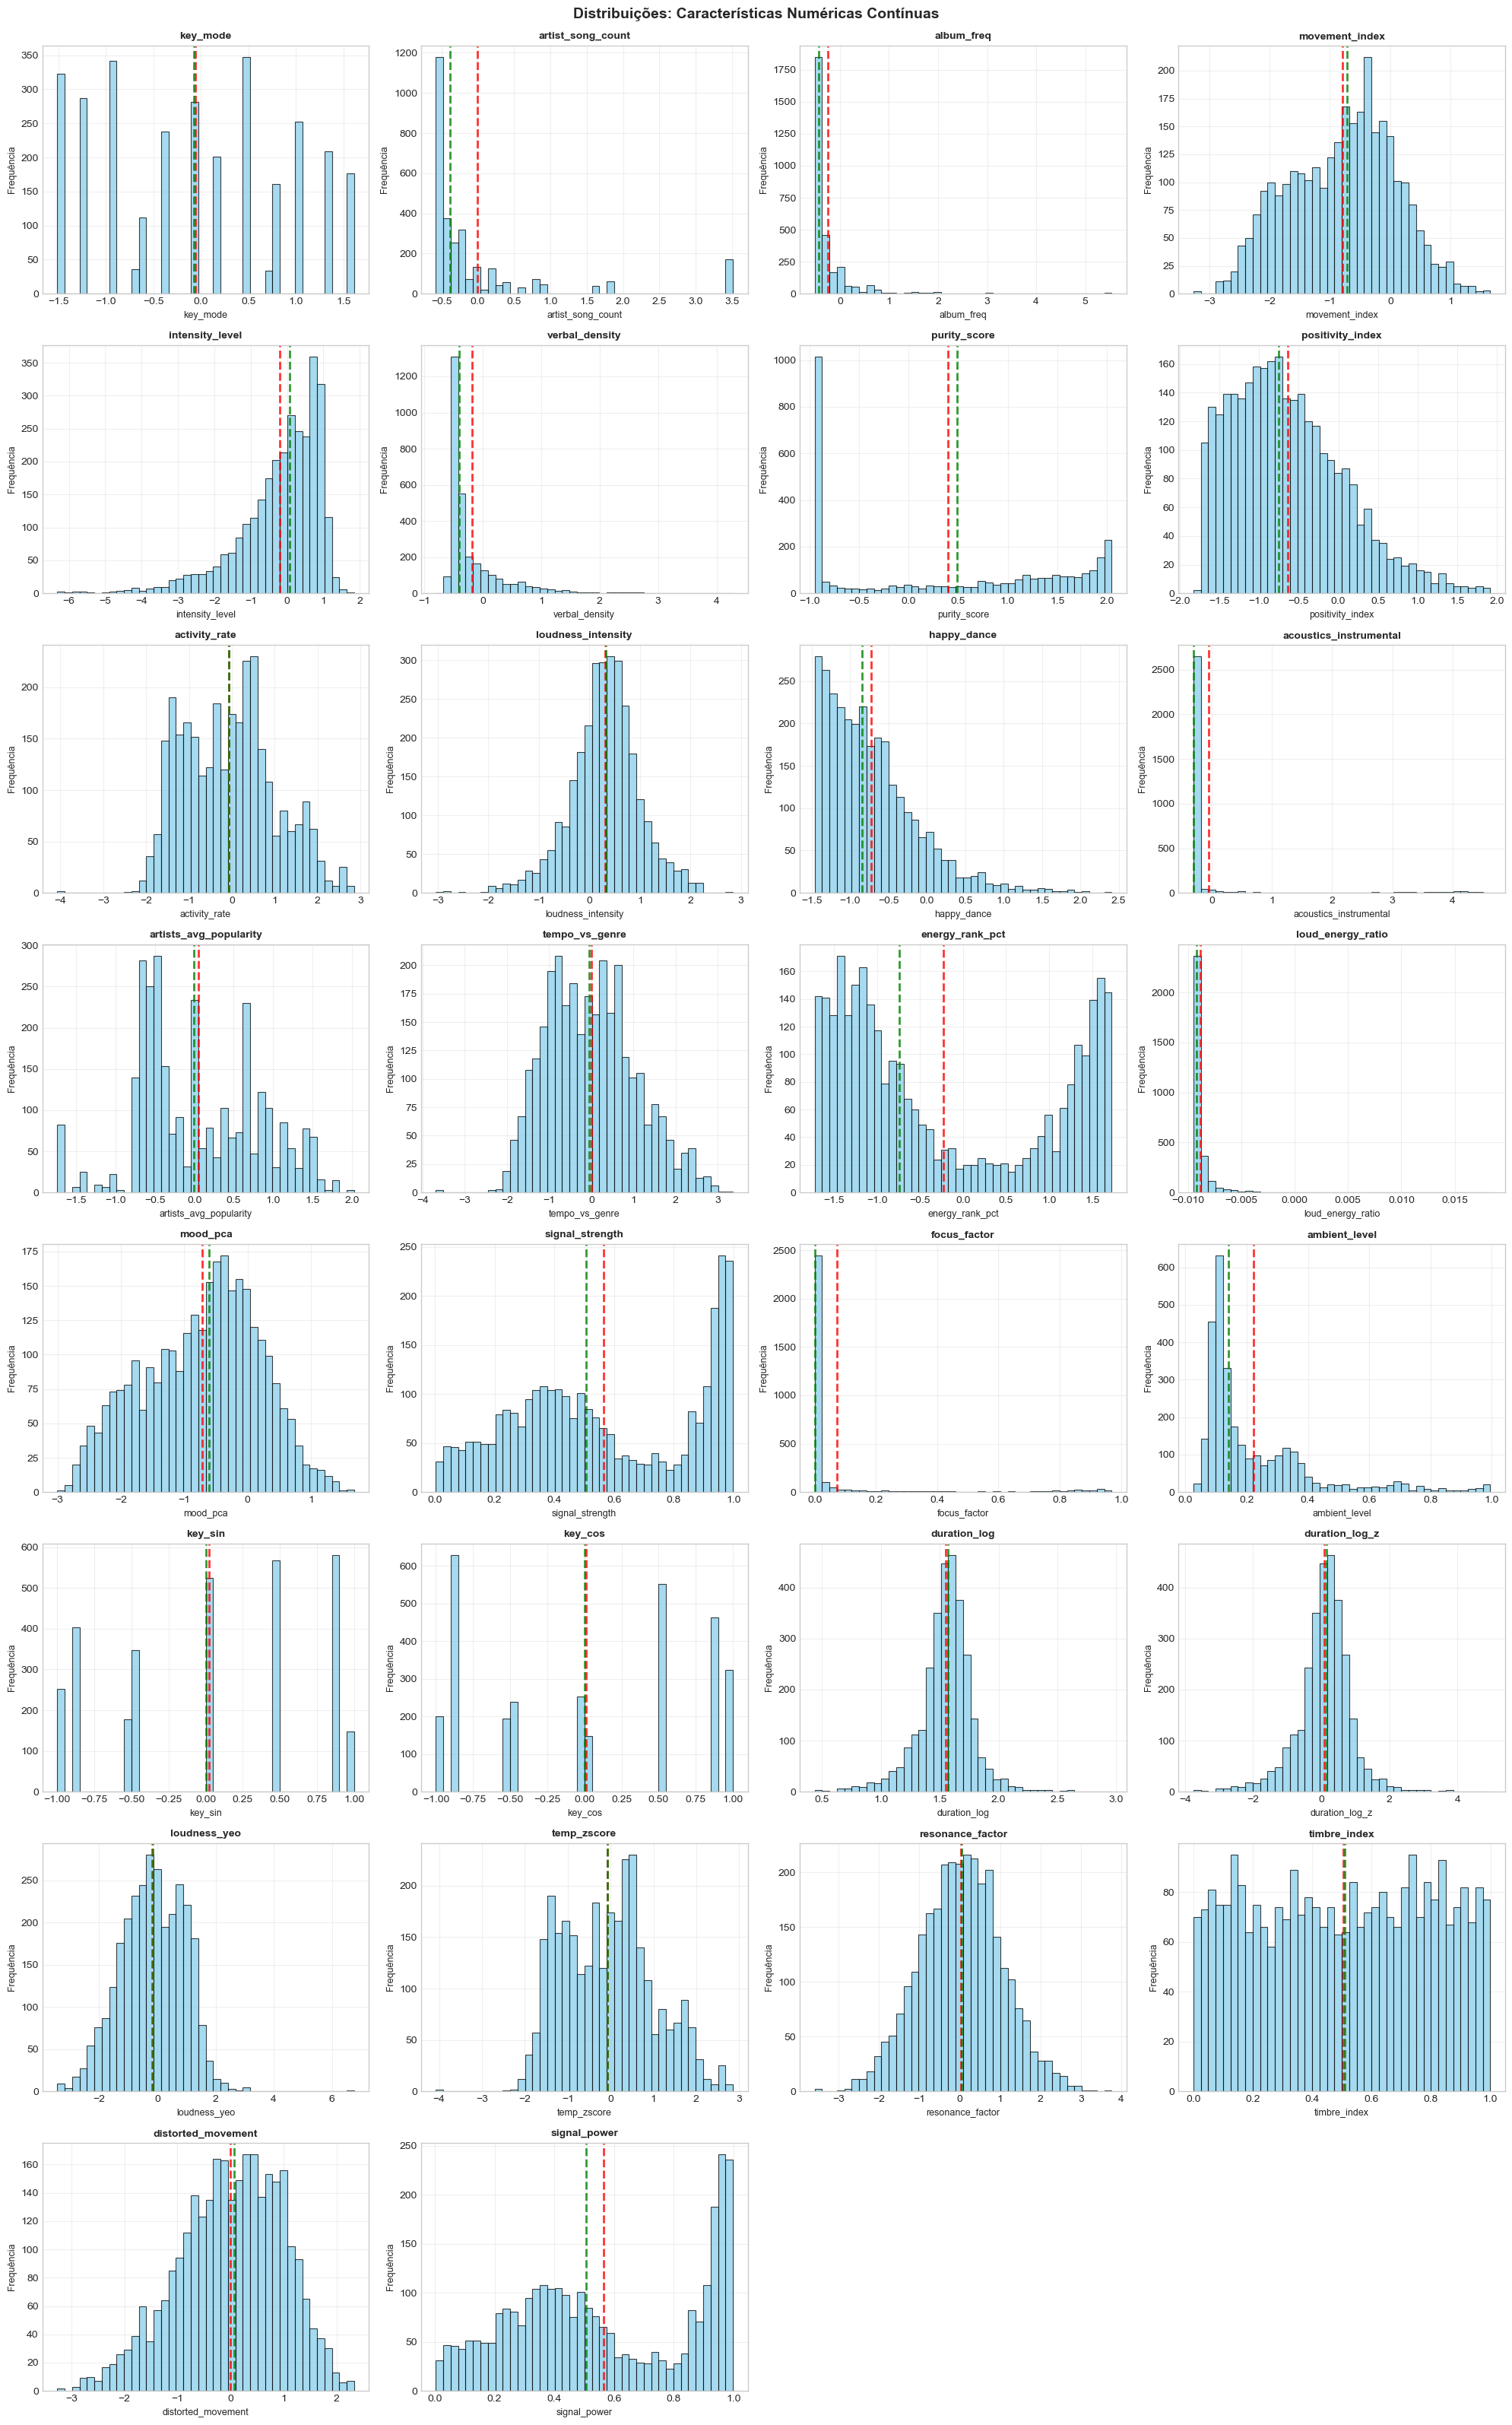

In [ ]:
# Histogramas de características numéricas
n_features = len(continuous_features)
n_cols = 4
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, feature in enumerate(continuous_features):
    ax = axes[idx]
    ax.hist(df[feature], bins=40, edgecolor='black', alpha=0.75, color='skyblue', linewidth=0.8)
    ax.axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, alpha=0.8)
    ax.axvline(df[feature].median(), color='green', linestyle='--', linewidth=2, alpha=0.8)
    ax.set_xlabel(feature, fontsize=9)
    ax.set_ylabel('Frequência', fontsize=9)
    ax.set_title(feature, fontsize=10, fontweight='bold')
    ax.grid(True, alpha=0.3)

for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Distribuições: Características Numéricas Contínuas', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

**Heterogeneidade das Distribuições:** As 30 características contínuas apresentam formas distribucionais muito variadas. Algumas aproximam-se de distribuições normais (distribuição em sino simétrica), enquanto outras mostram assimetrias pronunciadas (positivas ou negativas) ou distribuições multimodais.

**Identificação de Padrões:**
- Features com assimetria positiva (cauda direita) indicam concentração em valores baixos com casos extremos elevados
- Features com distribuições bimodais podem capturar subpopulações distintas no dataset
- Features aproximadamente simétricas são mais compatíveis com pressupostos de normalidade dos métodos lineares

**Comparação Média vs. Mediana:** A sobreposição das linhas verticais (média em vermelho, mediana em verde) fornece indicador visual rápido de assimetria. Quando média e mediana coincidem, a distribuição é aproximadamente simétrica. Separação substancial indica assimetria, com média puxada na direção da cauda mais longa.

### 5.4. Análise de Outliers via Boxplots

Os boxplots complementam os histogramas na detecção de outliers, usando o método IQR (Interquartile Range) para identificação formal de observações extremas.

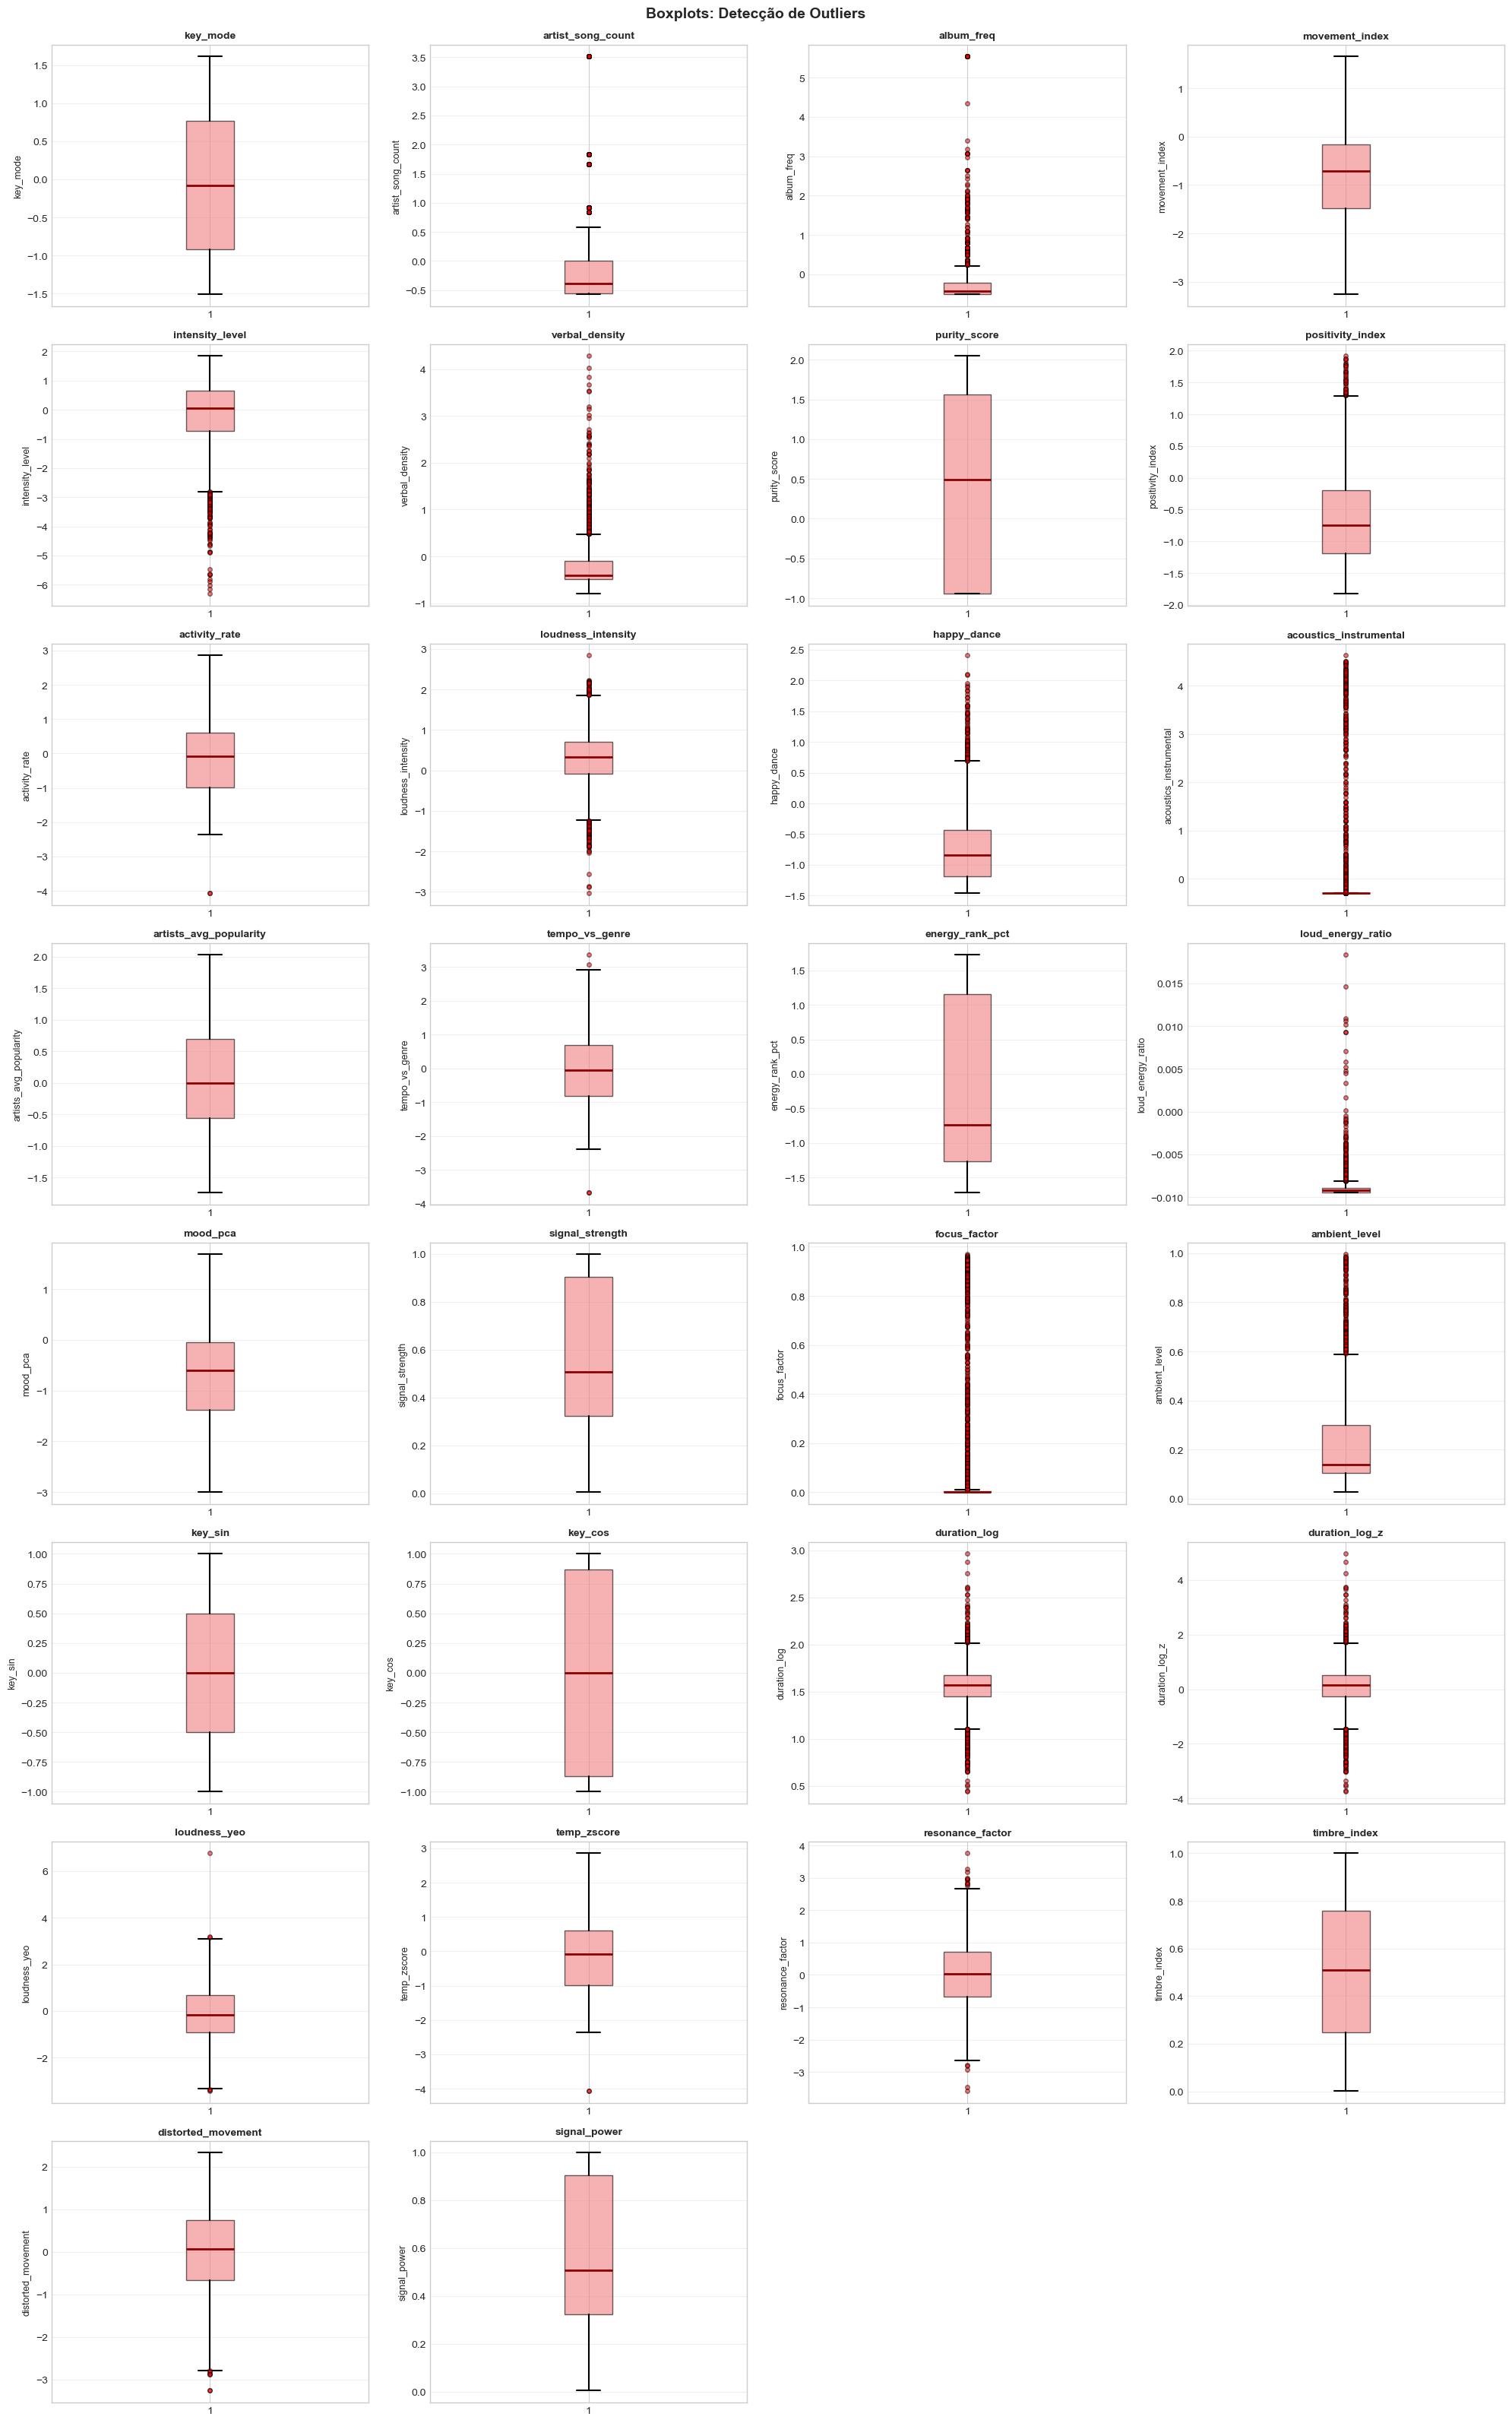

In [ ]:
# Boxplots de características numéricas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, feature in enumerate(continuous_features):
    ax = axes[idx]
    bp = ax.boxplot(df[feature], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightcoral', alpha=0.6),
                    medianprops=dict(color='darkred', linewidth=2),
                    whiskerprops=dict(linewidth=1.5),
                    capprops=dict(linewidth=1.5),
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.5))
    ax.set_ylabel(feature, fontsize=9)
    ax.set_title(feature, fontsize=10, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Boxplots: Detecção de Outliers', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [ ]:
# Quantificação de outliers usando método IQR
numeric_cols = [c for c in df.columns 
                if pd.api.types.is_numeric_dtype(df[c]) 
                and c not in all_targets]

summaries = []
for col in numeric_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    if iqr == 0:
        continue
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    n_out = ((df[col] < lower) | (df[col] > upper)).sum()
    
    summaries.append({
        'feature': col,
        'n_outliers': n_out,
        'pct_outliers': (n_out / len(df)) * 100,
        'lower_bound': lower,
        'upper_bound': upper
    })

pd.DataFrame(summaries).set_index('feature').sort_values('pct_outliers', ascending=False)

,n_outliers,pct_outliers,lower_bound,upper_bound
feature,,,,
acoustics_instrumental,657,21.9000,-0.3082,-0.3032
focus_factor,636,21.2000,-0.0071,0.0118
artist_song_count,392,13.0667,-1.3808,0.8313
verbal_density,317,10.5667,-1.0746,0.4850
loud_energy_ratio,260,8.6667,-0.0102,-0.0081
album_freq,257,8.5667,-0.9623,0.2307
ambient_level,208,6.9333,-0.1885,0.5915
duration_log,186,6.2000,1.1043,2.0162
duration_log_z,186,6.2000,-1.4483,1.6991


**Prevalência de Outliers:** A análise quantitativa revela presença substancial de outliers em múltiplas características. acoustics_instrumental apresenta 21.9% de observações classificadas como outliers pelo critério IQR, seguida por focus_factor (21.2%) e artist_song_count (13.1%). Esta prevalência alta (>10% em várias features) indica distribuições de cauda pesada, consistente com os valores de curtose elevados observados nas estatísticas descritivas.

**Interpretação dos Outliers:** Outliers podem representar:
1. Observações legítimas de fenómenos raros (e.g., faixas musicais genuinamente atípicas)
2. Erros de medição ou problemas de qualidade de dados
3. Subpopulações distintas não capturadas pelas features

A decisão de remover ou manter outliers depende do contexto. Para este dataset de música, valores extremos em features como acoustics_instrumental ou verbal_density provavelmente representam géneros ou estilos musicais específicos (e.g., música clássica instrumental vs. hip-hop com alta densidade lírica), sendo informação legítima.

**Decisão:** Manter outliers por representarem variabilidade legítima no domínio musical. A regularização nos modelos providenciará robustez adequada.

### 5.5. Distribuição - Características Categóricas Ordinais

In [ ]:
# Função para apresentar tabelas de frequências
def mostrar_tabelas_frequencias(df, features, titulo="Características"):
    print(f"\nTabelas de Frequências - {titulo}:")
    print("="*80)
    for feature in features:
        print(f"\n{feature}:")
        print("-"*50)
        vc = df[feature].value_counts().sort_index()
        print(pd.DataFrame({
            'Frequência': vc,
            'Percentagem': (vc / len(df) * 100).round(2)
        }))

In [ ]:
# Tabelas de frequências para características ordinais
mostrar_tabelas_frequencias(df, ordinal_features, "Características Ordinais")


Tabelas de Frequências - Características Ordinais:

loudness_level:
--------------------------------------------------
                Frequência  Percentagem
loudness_level                         
0.0000                 418      13.9300
1.0000                 462      15.4000
2.0000                 610      20.3300
3.0000                 644      21.4700
4.0000                 866      28.8700

popularity_level:
--------------------------------------------------
                  Frequência  Percentagem
popularity_level                         
0.0000                    77       2.5700
1.0000                  1697      56.5700
2.0000                   384      12.8000
3.0000                   837      27.9000
4.0000                     5       0.1700

tempo_class:
--------------------------------------------------
             Frequência  Percentagem
tempo_class                         
0.0000              102       3.4000
1.0000             2565      85.5000
2.0000              333

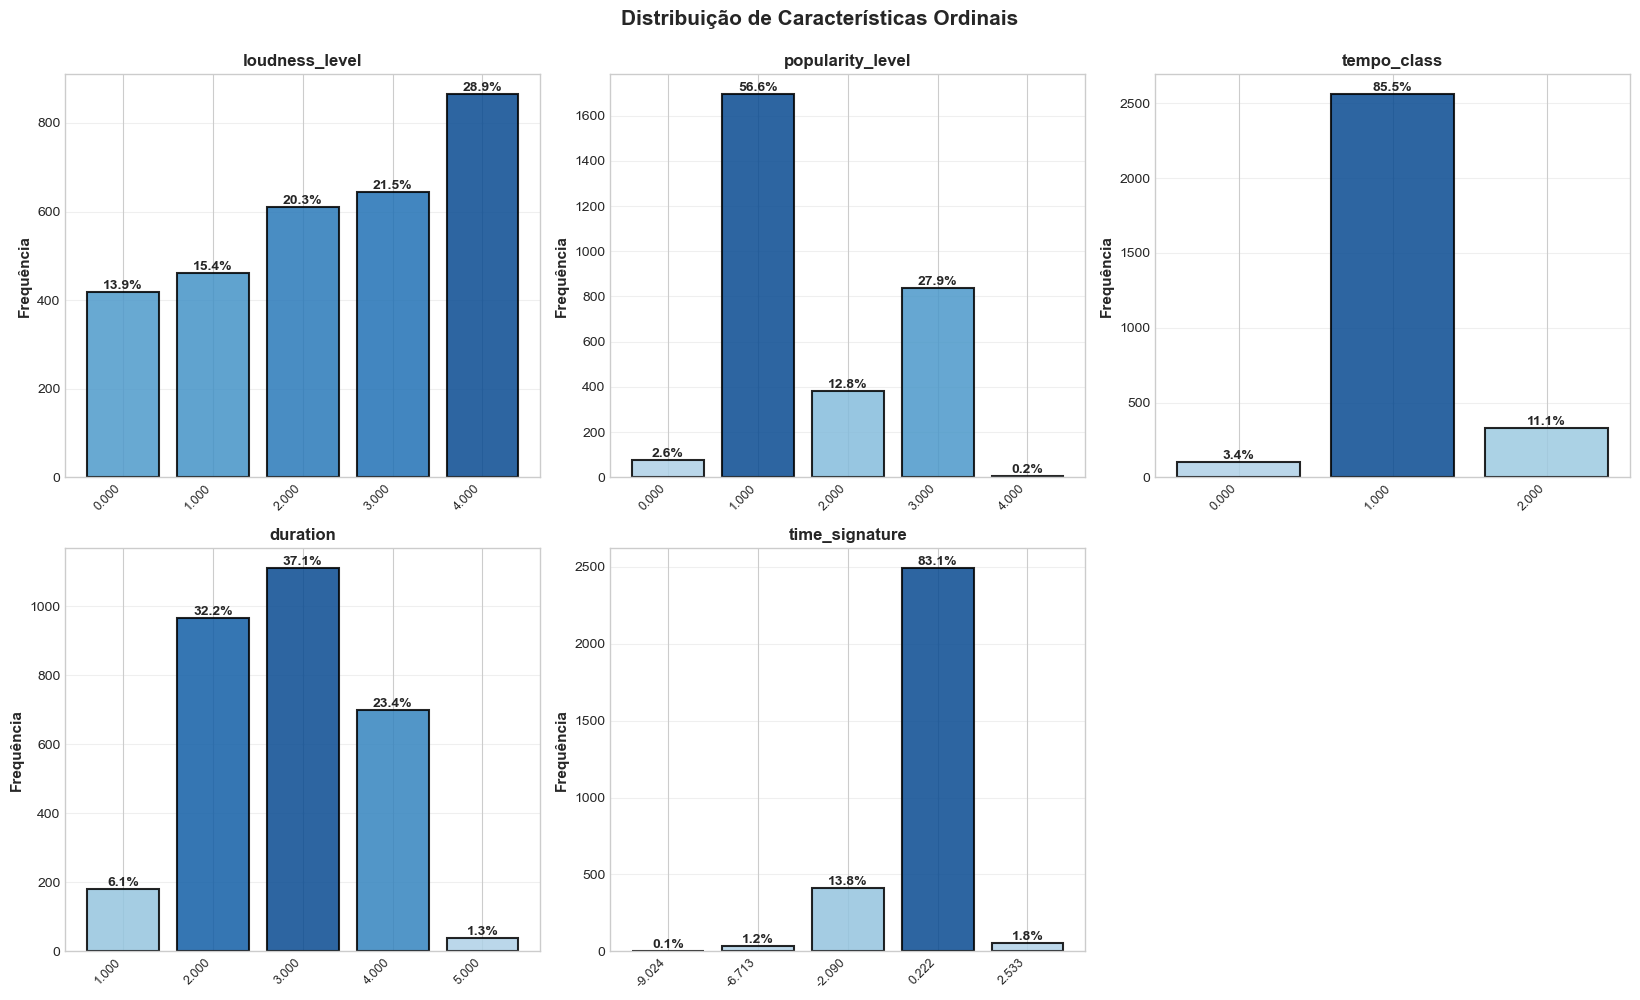

In [ ]:
# Gráficos de barras para características ordinais
plotar_graficos_barras_categoricas(df, ordinal_features,
                                   "Distribuição de Características Ordinais", ncols=3)

**Concentração em Categorias Dominantes:** As visualizações confirmam quantitativamente a baixa entropia de várias features ordinais. tempo_class e time_signature apresentam concentração extrema (>80%) numa única categoria, aproximando-se de features constantes. Esta falta de variabilidade limita o seu potencial discriminativo.

**Gradações em duration:** A variável duration consolidada mostra distribuição mais dispersa entre as cinco categorias, com predomínio da categoria 3 (37.1%). As categorias extremas (1 e 5) têm frequências menores, capturando faixas com durações atípicas. Esta distribuição aproximadamente unimodal sugere que a maioria das músicas tem duração média, com menos exemplos de faixas muito curtas ou muito longas.

**Ordinality Preservada:** Os gráficos respeitam a ordem natural das categorias ordinais, permitindo observar padrões de monotonia ou picos em categorias intermédias. Esta ordenação é relevante para métodos que podem explorar a estrutura ordinal (e.g., ordinal encoding em vez de one-hot).

### 5.6. Distribuição - Características Categóricas Nominais

In [ ]:
# Tabelas de frequências para características nominais
mostrar_tabelas_frequencias(df, nominal_features, "Características Nominais")


Tabelas de Frequências - Características Nominais:

mood_cluster:
--------------------------------------------------
              Frequência  Percentagem
mood_cluster                         
-1.4438              192       6.4000
-1.1098              438      14.6000
-0.7758              350      11.6700
-0.4418              244       8.1300
-0.1078              521      17.3700
0.2262               331      11.0300
0.5602                 2       0.0700
0.8942               187       6.2300
1.2282               293       9.7700
1.5622               391      13.0300
1.8962                51       1.7000

acoustic_valence_mood_cluster:
--------------------------------------------------
                               Frequência  Percentagem
acoustic_valence_mood_cluster                         
-1.5812                               461      15.3700
-1.2517                                46       1.5300
-0.9221                               762      25.4000
-0.5926                       

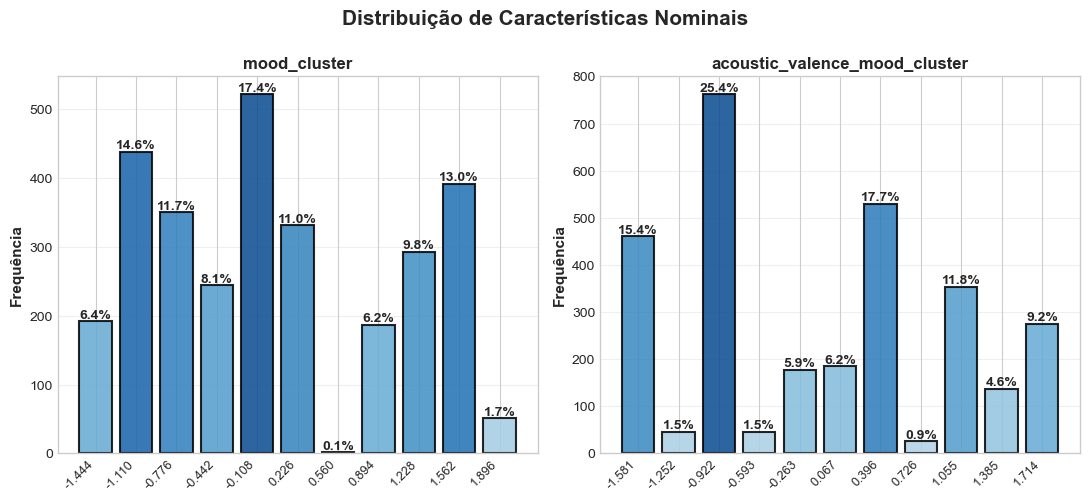

In [ ]:
# Gráficos de barras para características nominais
plotar_graficos_barras_categoricas(df, nominal_features, 
                                   "Distribuição de Características Nominais", ncols=2)

**Estrutura dos Clusters:** Os dois clusters nominais (mood_cluster e acoustic_valence_mood_cluster) distribuem as 3000 observações por 11 categorias cada. A frequência máxima ocorre em categorias específicas (17.4% e 25.4%), mas sem a concentração extrema observada nas ordinais. Esta distribuição mais equilibrada sugere que os algoritmos de clustering subjacentes identificaram estruturas multi-modais nos dados originais.

**Interpretação dos Clusters:** Estes agrupamentos foram derivados de análises dimensionais prévias (PCA para mood_pca, clustering para os grupos). Cada cluster nominal representa uma combinação de propriedades acústicas e afetivas. A ausência de ordenação natural entre clusters requer codificação dummy se incluídos em modelos lineares, expandindo o feature space em 10 colunas binárias por variável nominal.

### 5.7. Distribuição - Características Binárias

In [ ]:
# Tabelas de frequências para características binárias
mostrar_tabelas_frequencias(df, binary_features, "Características Binárias")


Tabelas de Frequências - Características Binárias:

explicit:
--------------------------------------------------
          Frequência  Percentagem
explicit                         
0.0000          2706      90.2000
1.0000           294       9.8000

mode_indicator:
--------------------------------------------------
                Frequência  Percentagem
mode_indicator                         
0.0000                 960      32.0000
1.0000                2040      68.0000

time_signature_class_boolean:
--------------------------------------------------
                              Frequência  Percentagem
time_signature_class_boolean                         
0.0000                                94       3.1300
1.0000                              2906      96.8700

is_instrumental:
--------------------------------------------------
                 Frequência  Percentagem
is_instrumental                         
0.0000                 2872      95.7300
1.0000                  128     

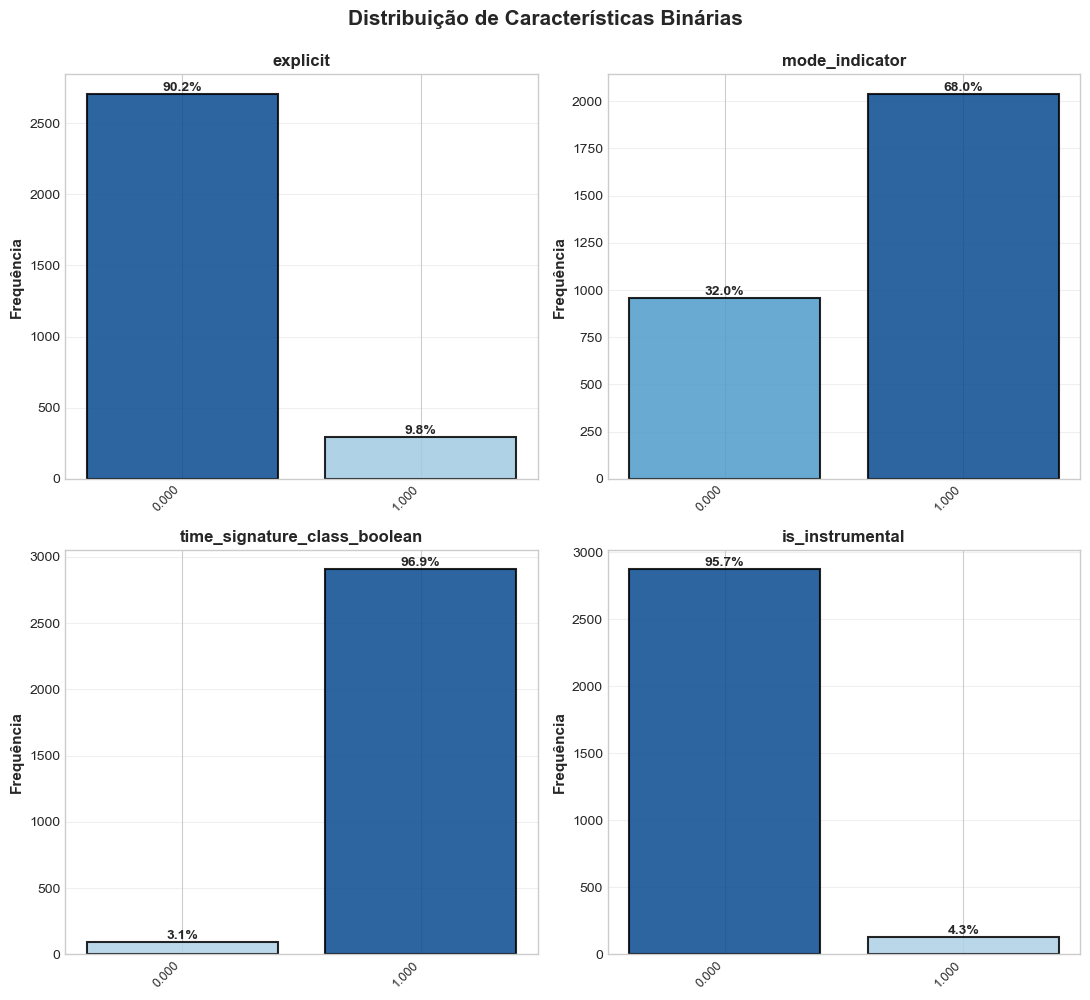

In [ ]:
# Gráficos de barras para características binárias
plotar_graficos_barras_categoricas(df, binary_features, 
                                   "Distribuição de Características Binárias", ncols=2)

**Assimetria Binária Confirmada:** As visualizações evidenciam o forte desbalanceamento nas features binárias. explicit (9.8% de 1s), is_instrumental (4.3% de 1s) e time_signature_class_boolean (3.1% de 0s) apresentam a classe minoritária com frequência <10%. Esta assimetria extrema aproxima estas features de indicadores raros.

**Entropia e Informação:** Uma feature binária perfeitamente balanceada (50%/50%) tem entropia máxima de 1 bit. Com proporções de 90/10 ou mais extremas, a entropia cai drasticamente, significando baixo conteúdo informativo. Em termos práticos, estas features contribuem pouco para discriminação porque a classe dominante é altamente previsível.

**Mode Indicator:** A variável mode_indicator apresenta distribuição menos extrema (68%/32%), mantendo entropia moderada. Esta feature tem potencial para contribuir significativamente, especialmente se a classe minoritária (modo menor) estiver associada a padrões específicos no target.